In [1]:
from torch import nn
import torch

aa = torch.randn(1,2)
a = nn.ZeroPad1d((0,5,0,0))

a(aa).shape

/Users/rainism/opt/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: module 'torch.nn' has no attribute 'ZeroPad1d'

In [6]:
import torch
import torch.nn as nn
# from conformer import Conformer

batch_size, sequence_length, dim = 3, 12345, 80

cuda = torch.cuda.is_available()  
device = torch.device('cuda' if cuda else 'cpu')

criterion = nn.CTCLoss().to(device)

inputs = torch.rand(batch_size, sequence_length, dim).to(device)
input_lengths = torch.LongTensor([12345, 12300, 12000])
targets = torch.LongTensor([[1, 3, 3, 3, 3, 3, 4, 5, 6, 2],
                            [1, 3, 3, 3, 3, 3, 4, 5, 2, 0],
                            [1, 3, 3, 3, 3, 3, 4, 2, 0, 0]]).to(device)
target_lengths = torch.LongTensor([9, 8, 7])

model = Conformer(num_classes=10, 
                  input_dim=dim, 
                  encoder_dim=32, 
                  num_encoder_layers=3).to(device)

# Forward propagate
# outputs, output_lengths = model(inputs, input_lengths)

# Calculate CTC Loss
# loss = criterion(outputs.transpose(0, 1), targets, output_lengths, target_lengths)

In [8]:
inputs.shape

torch.Size([3, 12345, 80])

In [9]:
targets.shape

torch.Size([3, 10])

In [11]:
target_lengths.shape

torch.Size([3])

In [47]:
a(aa)

tensor([[-0.3966,  0.4478,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])

In [37]:
a(aa)

tensor([[[ 1.7903, -0.0195],
         [-0.2571,  0.4554],
         [-2.6721,  0.7061]]])

In [26]:
for a,b,c,d in zip([1,2],[3,4],[5,6],[7,8]):
    print(a,b,c,d)
    break

1 3 5 7


In [25]:
aa[0].narrow(0,0,10)

RuntimeError: start (0) + length (10) exceeds dimension size (3).

In [20]:
aa.narrow(0,0,10).copy_(aa)

RuntimeError: start (0) + length (10) exceeds dimension size (1).

In [1]:
import Jeon.nestedtensor as nestedtensor

nestedtensor

ModuleNotFoundError: No module named 'nestedtensor'

In [ ]:
import os
from Jeon.modules.vocab import KoreanSpeechVocabulary

vocab = KoreanSpeechVocabulary(os.path.join(os.getcwd(), 'labels.csv'), output_unit='character')


In [3]:
import numpy as np


aa = np.array([1,2,3,4,5])

np.where((aa > 3) == True)[0]

array([3, 4])

In [6]:
aa[[True,False,True,False,True]]

array([1, 3, 5])

In [35]:
import pydub

audio_path = '/Users/rainism/Desktop/2023_AI_hub/2023_preliminary_kasr/task3_02.pcm'

signal = np.memmap(audio_path, dtype='h', mode='r').astype('float32')
signal_normalized = signal/32767

def detect_silence(pcm, audio_threshold = 0.0075, min_silence_len = 3, ratio=16000, make_silence_len=1):
    if len(pcm) < min_silence_len*ratio:
        return []
    
    b = np.where((abs(pcm) > audio_threshold) == True)[0] # 소리가 나는 부분
    c = np.concatenate(([0], b[:-1]), axis=0)

    starts = c[(b-c)>min_silence_len*ratio]               # 소리가 안나는 부분 시작
    ends = b[(b-c)>min_silence_len*ratio]

    if len(ends) == 0:
        return pcm
    else:
        non_masking = np.array([True]*len(pcm))
        for (s,e) in zip(starts, ends):
            non_masking[s:e+1] = False
            non_masking[e-make_silence_len*16000:e+1] = True
        
        return pcm[non_masking]
    

aa = detect_silence(signal_normalized)

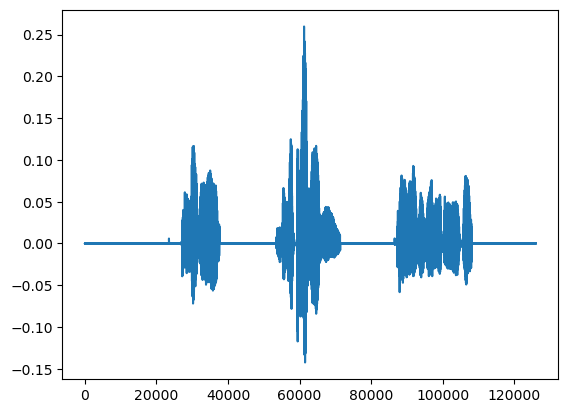

In [36]:
import matplotlib.pyplot as plt
plt.plot(aa)

In [34]:
16000*4

64000

In [27]:
np.array([True]*len(signal_normalized))

array([ True,  True,  True, ...,  True,  True,  True])

0

In [22]:
len(b)

34254

In [23]:
len(c)

34254

In [24]:
starts

array([], dtype=int64)